<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%BF%A1%EB%B6%81/06_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%A3%A8%EA%B8%B0_ws_ARIMA%EB%B0%8Fresample%EB%B3%B4%EC%99%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 다루기
 - 머신러닝쿡북의 7강 날짜와 시간데이터 다루기 참조

## 문자열을 날짜로 변환하기
- 날짜, 시간을 나타내는 문자열벡터를 시계열데이터로 변환하기

In [ ]:
import numpy as np
import pandas as pd
date = np.array(['03-04-2005 11:35 PM',
                 '23-05-2010 12:01 AM',
                 '04-09-2009 09:09 PM'])
# Timestamp객체로 변환
[pd.to_datetime(d, format='%d-%m-%Y %I:%M %p') for d in date]

[Timestamp('2005-04-03 23:35:00'),
 Timestamp('2010-05-23 00:01:00'),
 Timestamp('2009-09-04 21:09:00')]

- 날짜와 시간 문자열을 다룰때 어려운 점은 문자열의 포멧이 데이터 소스마다 크게 다른 점이기에 format매개변수를 사용하여 적합한 문자열의 포멧을 지정해야함.

|코드|설명|예|
|-|-|-|
|%Y|전체년도|2001|
|%m|0으로시작하는월|04|
|%d|0으로시작하는일|09|
|%I|0으로시작하는시간(12시간제)|04|
|%p|AM 또는 PM|AM|
|%M|0으로시작하는분|05|
|%S|0으로시작하는초|09|

[참고: 파이썬문자열타임코드전체목록](http://strftime.org)


## 시간대 다루기
- 시간대(timezone)정보를 추가/변경

In [ ]:
import pandas as pd
date_in_london = pd.Timestamp('2017-05-01 06:00:00', tz= 'Europe/London')
date_in_london

Timestamp('2017-05-01 06:00:00+0100', tz='Europe/London')

In [ ]:
# 다른 시간대로 변환
date_in_london.tz_convert('Asia/Seoul')

Timestamp('2017-05-01 14:00:00+0900', tz='Asia/Seoul')

## 날짜와 시간 선택하기
- pd.date_range로 시계열생성
  + periods = 총기간
  + freq = 'H'시간단위 / 'D' 일단위 / 'M' 월단위 / 'Y' 년단위
  + tz = time zone


In [ ]:
dates = pd.Series(pd.date_range('2/2/2002',periods=10,freq='D',tz= 'Europe/London'))
dates

0   2002-02-02 00:00:00+00:00
1   2002-02-03 00:00:00+00:00
2   2002-02-04 00:00:00+00:00
3   2002-02-05 00:00:00+00:00
4   2002-02-06 00:00:00+00:00
5   2002-02-07 00:00:00+00:00
6   2002-02-08 00:00:00+00:00
7   2002-02-09 00:00:00+00:00
8   2002-02-10 00:00:00+00:00
9   2002-02-11 00:00:00+00:00
dtype: datetime64[ns, Europe/London]

- 불리언 검색

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['date'] = pd.date_range('1/1/2001', periods=100000, freq='H')
df[(df['date']>'2002-1-1 01:00:00')&
  (df['date']<='2002-1-1 04:00:00')]

,date
8762,2002-01-01 02:00:00
8763,2002-01-01 03:00:00
8764,2002-01-01 04:00:00


- 날짜 인덱싱

In [ ]:
df = df.set_index(df['date'])
df.loc['2002-1-1 01:00:00':'2002-1-1 04:00:00']

,date
date,
2002-01-01 01:00:00,2002-01-01 01:00:00
2002-01-01 02:00:00,2002-01-01 02:00:00
2002-01-01 03:00:00,2002-01-01 03:00:00
2002-01-01 04:00:00,2002-01-01 04:00:00


## 날짜데이터를 여러 특성으로 나누기
- 날짜와 시간의 열을 가지고 년/월/일/시/분에 해당하는 특성만들기

In [ ]:
import pandas as pd
df= pd.DataFrame()
df['date'] = pd.date_range('1/1/2001',periods=1000,freq='d')

df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()

df.head(2)

,date,year,quarter,month,day,weekday,hour,minute,second,month_name,day_name
0,2001-01-01,2001,1,1,1,0,0,0,0,January,Monday
1,2001-01-02,2001,1,1,2,1,0,0,0,January,Tuesday


## 날짜 간의 차이를 계산하기
- 샘플이 두개의 datetime 특성 있을 때 이 특성사이 시간 계산

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['Arrived'] = [pd.Timestamp('01-01-2017 7:00:00'), pd.Timestamp('01-04-2017')]
df['Left'] = [pd.Timestamp('01-01-2017 19:50:00'), pd.Timestamp('01-06-2017')]

# 시간차 계산
df['Left']-df['Arrived']

0   0 days 12:50:00
1   2 days 00:00:00
dtype: timedelta64[ns]

In [ ]:
# day날리고 숫자만 보이길 원할경우 (예시> 초단위 표기)
pd.Series(d.days*60*60*24+d.seconds for d in (df['Left']-df['Arrived']))

0     46200
1    172800
dtype: int64

## 시차 특성 만들기
특정 간격으로 생성한 경우, 과거값을 이용하여 예측을 만들기도함 <br>
특히 시계열분석에서 차분을 해줄 경우 활용 .diff(), .shift()

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['date'] = pd.date_range('1/1/2001', periods=5,freq='D')
df['price'] =[1.1, 2.2, 3.3, 4.4, 5.5]
df['change'] = df['price'].diff(1)
df

,date,price,change
0,2001-01-01,1.1,NaN
1,2001-01-02,2.2,1.1
2,2001-01-03,3.3,1.1
3,2001-01-04,4.4,1.1
4,2001-01-05,5.5,1.1


## 이동시간 윈도 계산하기
- 이동평균선 구함. 0일 평균선등 구하여 평균에 회귀하는 특성으로 시계열예측

In [ ]:
import pandas as pd
import numpy as np
time_index = pd.date_range('01/01/2010',periods=100,freq='M')
df= pd.DataFrame(index = time_index)
df['price'] = np.random.randint(1,10,100)
df

,price
2010-01-31,2
2010-02-28,3
2010-03-31,3
2010-04-30,4
2010-05-31,6
...,...
2017-12-31,4
2018-01-31,6
2018-02-28,7
2018-03-31,8


- rolling의 연산은 평균(mean)뿐 아니라 최대값(max), 상관관계(corr), 샘플개수(count) 등과 같은 통계도 간편히 계산 가능
- 이동평균은 단기간의 급한 변화를 완화시키기 때문에 시계열 데이터를 부드럽게 만들기 위해 사용

[참고 : 판다스의 이동윈도 설명](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#rolling-windows)

In [ ]:
# 5일, 20일 평균선
df['mean_price_5d']= df['price'].rolling(window=5).mean().bfill()
df['mean_price_20d']= df['price'].rolling(window=20).mean().bfill()
df

,price,mean_price_5d,mean_price_20d
2010-01-31,2,3.6,4.95
2010-02-28,3,3.6,4.95
2010-03-31,3,3.6,4.95
2010-04-30,4,3.6,4.95
2010-05-31,6,3.6,4.95
...,...,...,...
2017-12-31,4,4.8,5.20
2018-01-31,6,5.0,5.25
2018-02-28,7,5.8,5.50
2018-03-31,8,6.6,5.55


- ewm연산은 최근 항목에 높은 가중치를 두지만 전체기간에 대한 통계를 계산함 (지수이동윈도,exponential moving window)

In [ ]:
df.ewm(alpha=0.8).mean()

,price,mean_price_5d,mean_price_20d
2010-01-31,2.000000,3.600000,4.950000
2010-02-28,2.833333,3.600000,4.950000
2010-03-31,2.967742,3.600000,4.950000
2010-04-30,3.794872,3.600000,4.950000
2010-05-31,5.559539,3.600000,4.950000
...,...,...,...
2017-12-31,4.635260,4.827623,5.238499
2018-01-31,5.727052,4.965525,5.247700
2018-02-28,6.745410,5.633105,5.449540
2018-03-31,7.749082,6.406621,5.529908


## 시계열 데이터에서 결측치 다루기
- 보간(interpolation)방법으로 결측치처리

In [ ]:
import pandas as pd
import numpy as np
time_index = pd.date_range('1/1/2010', periods=5,freq='M')
df=pd.DataFrame(index=time_index)
# 결측치 포함 생성
df['sales'] = [1,2,np.nan,np.nan,5]
df

,sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,5.0


In [ ]:
df.interpolate()

,sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,4.0
2010-05-31,5.0


In [ ]:
# 또는 앞뒤 수치로 채울수 있음
df.ffill()

,sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,2.0
2010-04-30,2.0
2010-05-31,5.0


In [ ]:
df.bfill()

,sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,5.0
2010-04-30,5.0
2010-05-31,5.0


- 비선형으로 가정시 method='quadratic'

In [ ]:
 df.interpolate(method='quadratic')

,sales
2010-01-31,1.000000
2010-02-28,2.000000
2010-03-31,3.059808
2010-04-30,4.038069
2010-05-31,5.000000


- 누락 간격이 커서 성능이 우려될때,
- limit으로 보간값 개수 제한하고, limit_direction으로 앞/뒤 것 중 결정

In [ ]:
df.interpolate(limit=1,limit_direction='forward')
# df.interpolate(limit=1,limit_direction='backward')

,sales
2010-01-31,1.0
2010-02-28,2.0
2010-03-31,3.0
2010-04-30,NaN
2010-05-31,5.0


## 시간인덱스 resample
- 시간도 groupby해서 계산할 수 있는 방법은 없을까?
  + 시간이 인덱스로 된 df에서 resample()을 하면 rule = Y/M/D/H 등의 인스턴스를 생성하며
  + last() 값을 가져올때 주기의 마지막값, first() 첫번째값, sum() 합계, mean() 평균 등 구할 수 있음

|시간단위|last|first
|-|-|-|
|초|s|-|
|분|min|
|시간|h|-|
|주|w|-|
|일|d|-|
|월|m|ms|
|분기|Q|-|
|연|y|ys|
|영업일|b|-|





In [ ]:
import pandas as pd
import numpy as np
time_index = pd.date_range('01/01/2010',periods=100,freq='d')
df= pd.DataFrame(index = time_index)
df['price'] = np.random.randint(1,10,100)
df

,price
2010-01-01,6
2010-01-02,5
2010-01-03,3
2010-01-04,5
2010-01-05,8
...,...
2010-04-06,1
2010-04-07,3
2010-04-08,6
2010-04-09,1


In [ ]:
df.resample(rule='M').last().head(5)
# df.resample(rule='M').last()

,price
2010-01-31,6
2010-02-28,8
2010-03-31,1
2010-04-30,4


- 주 별 가격 구하기, 요일을 맞추기 위해 offset을 활용

In [ ]:
df.resample(rule='7D', offset='2d').agg(['sum','min','max']).head()

price        
             sum min max
2009-12-27    11   5   6
2010-01-03    40   2   9
2010-01-10    44   4   9
2010-01-17    40   2   9
2010-01-24    36   1   9

- 분기 별 가격 구하기

In [ ]:
df.resample(rule='Q').agg(['sum','min','max']).head()

price        
             sum min max
2010-03-31   462   1   9
2010-06-30    36   1   7

# 시계열 예측


- 시계열 분석이란, 시간의 흐름에 따라 기록된 데이터를 바탕으로 미래의 변화에 대한 추세를 분석하는 방법
- 시간에 따라 데이터의 추세가 어떠한지 시간 외에 어떤한 외부요인이 데이터에 영향을 미치는지 나누어 생각할 수 있어야 한다.
- 시계열분석 + 군집분석 의 혼합형 문제도 나옴
- 해당 분석의 과정과 의의를 이해하는지도 물어 보고 있음
ARIMA 모형에 대한 상세 설명



## 전처리

In [ ]:
import pandas as pd
PULL = '2PACX-1vTNNrU1Tg2Apdf4RMbSMQgejIstZvvHWopUPnwlaJjKGm4htb6wNQiS8m0AsbLHt_LemJ0jMUxk6UuN'
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/e/{PULL}/pub?output=csv', names = ['day','price'])
df['day'] = pd.to_datetime(df['day'], format='%Y-%m-%d')
data = df.set_index('day')
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


항상 index는 timeseries로 구성되고, 1개의 열로 구성되어야 시계열 예측이 가능하다

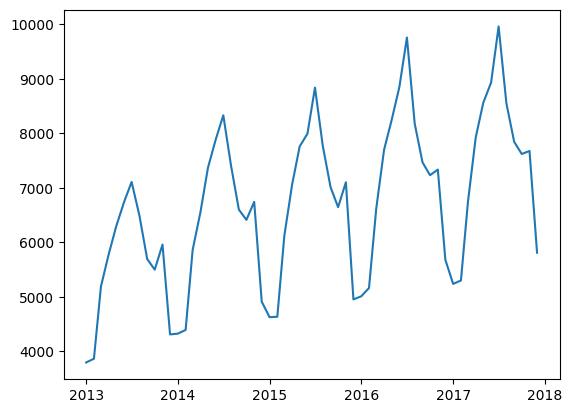

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['price'])

## 시계열분해
from statsmodels.tsa.seasonal import seasonal_decompose
- 추세(Trend), 계절성(Seasonality), 잔차(Residual)로 분해
- 시간의 요인은, 추세, 계절성, 외부요인은, 잔차(불규칙) 요인

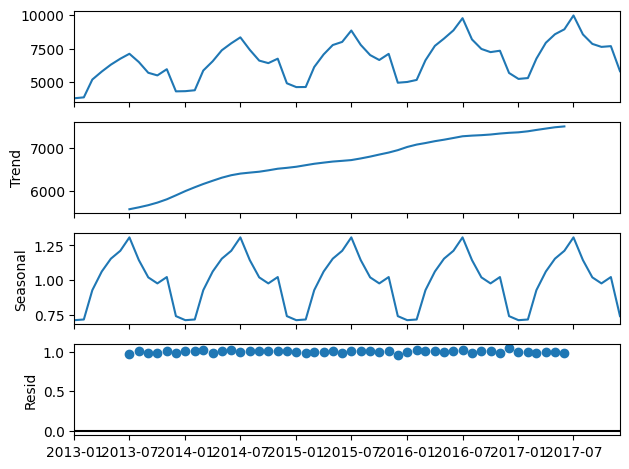

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model= 'multiplicative')
result.plot()
plt.show()

## 시계열 정상성
from statsmodels.tsa.stattools import adfuller
- 차분 후 (ts.diff(n)) 정상성 여부를 확인한다.
    - H0 : 데이터가 정상성을 갖지 않는다.
    - H1 : 데이터가 정상성을 갖는다

In [ ]:
from statsmodels.tsa.stattools import adfuller
training = data[:'2016-12-01']
test = data.drop(training.index)

adf  = adfuller(training, regression= 'ct')
print('adf : ',adf[0])
print('p-value : ',adf[1])


adf :  -1.9997199341327594
p-value :  0.601586330379429


### 차분 후 정상성 재확인
- 차분의 횟수를 d라 함

In [ ]:
diff_1 = training.diff(1)
diff_1 = diff_1.dropna()
adf  = adfuller(diff_1, regression= 'ct')
print('adf : ',adf[0])
print('p-value : ',adf[1])

adf :  -13.31815292097042
p-value :  5.5566210434957616e-21


### AR (Auto Regression)
from statsmodels.graphics.tsaplots import plot_acf
- 현시점의 데이터를 이전의 데이터들의과의 상관성으로 나타내는 모형
    + 과거의 값이 현재의 값에 얼마나 영향 미쳤나
- ACF(Auto Correlation Function)으로 최적의 p값을 찾음
    + 0으로 수렴할 때의 시차를 p값으로 함

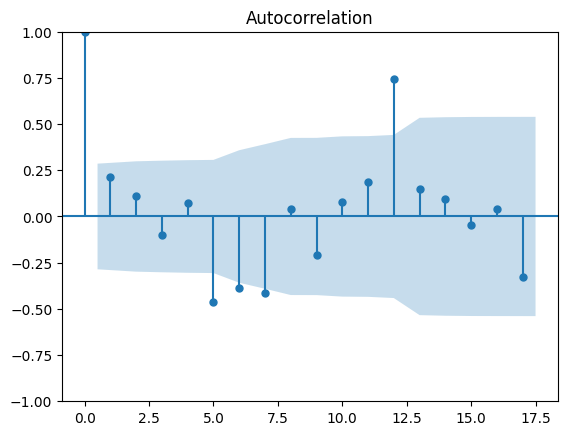

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_1)
plt.show()

### MA (Moving Average)
from statsmodels.graphics.tsaplots import plot_pacf
- 과거 예측오차 들의 가중이동평균으로 현재시점의 데이터를 표현하는 모형
    + 과거의 예측오차를 이용하여 미래를 예측
- PACF(Partial Auto Correlation Function)으로 q값을 찾음
    + 0이 수렴할 때의 q값을 MA의 q값으로 설정

C:\Dev\Miniconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


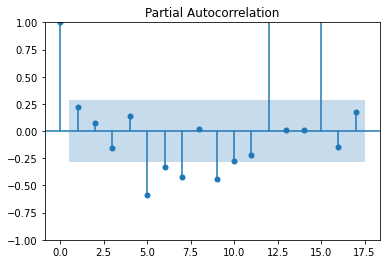

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(diff_1)
plt.show()

## ARIMA
from statsmodels.tsa.arima_model import ARIMA
- 비정상시계열 데이터를 정상시계열 만든 후 p, d ,q 를 구해서 예측
- 시계열 자료 외의 다른 자료 없을 때 그 변동상태를 확인할 수 있으며 어떠한 시계열에도 적용이 가능함

### 학습 및 해석

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(training, order = (2,1,2))
res = model.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 26 Aug 2023   AIC                            761.750
Time:                        13:04:24   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.940      0.000      -1.689      -0.945
ar.L2         -0.3191      0.190     -1.675      0.094      -0.692       0.054
ma.L1          1.9700      0.243      8.121      0.000       1.495       2.445
ma.L2          0.9950      0.241      4.126      0.000       0.522       1.468
sigma2      4.453e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.74e+27. Standard errors may be unstable.
"""

주의 깊게 살펴볼 부분은 AIC와 AR, MA 모델의 P-value임. 0.05이하면 사용가능.
AIC는 작을수록 성능 졿음

모델 확인 : predict() 활용

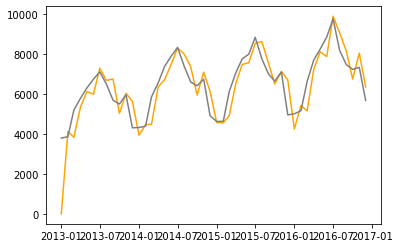

In [ ]:
plt.plot(res.predict(), color = 'orange')
plt.plot(training, color ='grey')

training 구간의 추정 확인, 어느정도 일치하는 것 보이나, 예측 살짝씩 뒤쳐짐

### 예측 : forecast() 활용
- 예측할 길이를 steps에 할당하여 확인

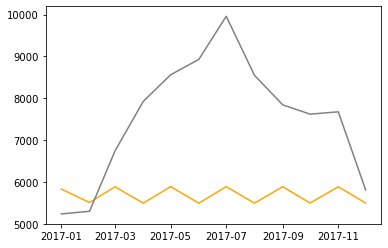

In [ ]:
pred_y = res.forecast(steps = len(test), alpha = 0.05) # 유의수준을 95%로 예측
plt.plot(pred_y, color = 'orange')
plt.plot(test, color ='grey')

예측 잘 안됨 확인

### 시계열모델 평가
R2나 RMSE등으로 잔차확인함. 단, ARIMA모델은 표본평균으로 회귀하려는 경향 때문에 R2이 작게 나오는 것으로 판단.
또한 계절성이 있는 경우 계정설 지수가 추가된 SARIMA를 사용하는 것이 좋음


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2_score : ",r2_score(test,pred_y))
print("mean_squared_error : ",mean_squared_error(test,pred_y))

r2_score :  -1.6440394214966672
mean_squared_error :  5302410.032415238


## SARIMA
- 데이터가 가진 주기성까지 고려한 ARIMA모델
    + auto arima를 통해 P, Q를 Grid_search로 찾을 수 있다.
    + 단, 차분 후 정상성을 확인한 d값 입력, 계절주기 m값 입력은 직접 진행 (# 계절에 대한 매개변수를 auto_arima에서는 m= 으로, sarima에서는 s=로 쓴다. 12개월 주기의 계절성을 보이므로 12로 설정         
    + (from statsmodels.tsa.stattools import adfuller 를 통해 정상성 확인)

In [ ]:
# 패키지 설치
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.5 MB/s eta 0:00:00


### 학습 및 해석

In [ ]:
from pmdarima import auto_arima
auto_model = auto_arima(training, d=1, seasonal=True, m=12, # 중요한 차분, 계절성 부터 수동으로 셋팅하자
                        start_p=0, start_q=0, max_p=3, max_q=3,
                        start_P=0 ,start_Q=0, max_P=3, max_Q=3,
                        information_criterion='aic', trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [ ]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 26 Aug 2023   AIC                            480.687
Time:                                     13:05:45   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC가 480인 모델의 최적의 모델로 선택, 이때 p=0, d=1, q=1임 <br>

### 예측
이번에는 좀 나은지 test데이터 예측하여 확인해보자

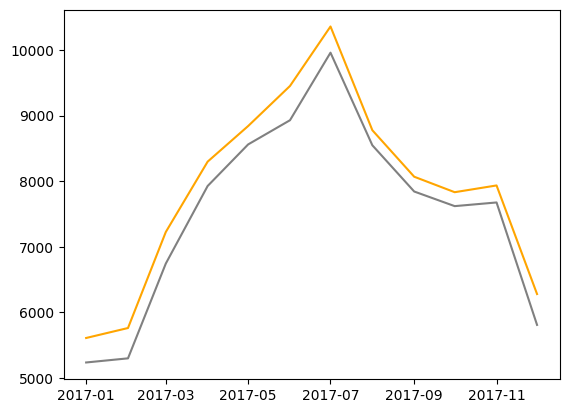

In [ ]:
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)),
                           index = test.index)
plt.plot(auto_pred_y, color = 'orange')
plt.plot(test, color ='grey')

계절성을 반영한 auto-arima가 훨씬 정확하게 예측하였음을 알수 있다.

### 평가

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
print('r2_score : ',r2_score(test, auto_pred_y))
print('RMSE : ', np.sqrt(mean_squared_error(test, auto_pred_y)))

r2_score :  0.9305467061841242
RMSE :  373.2064274724195
